In [37]:
#Imorting requred libraries and methods
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
#Reading the input data as CSV
df=pd.read_csv('carprices.csv')
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


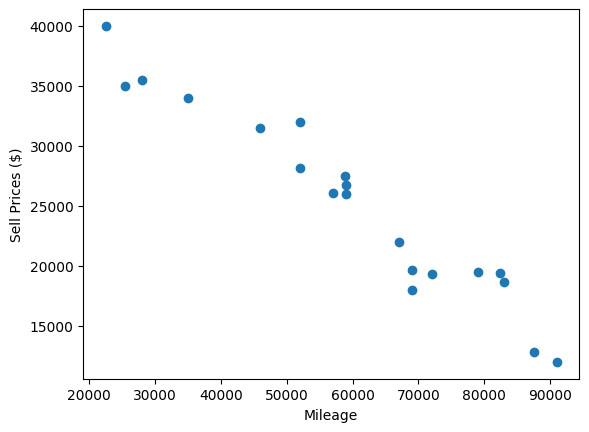

In [ ]:
#Initial Check of the data relationship by Visualization
plt.scatter(df["Mileage"],df["Sell Price($)"])
plt.xlabel("Mileage")
plt.ylabel("Sell Prices ($)")
plt.show()

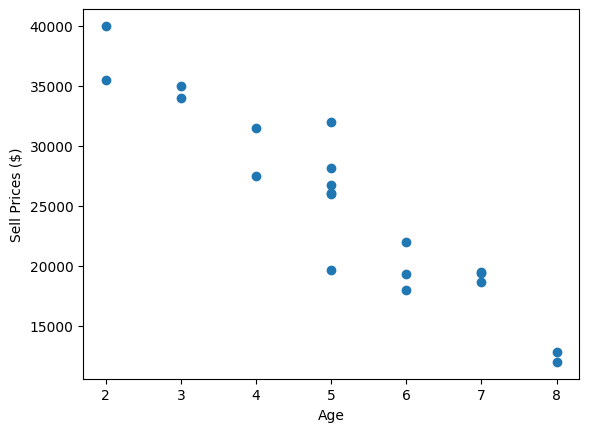

In [40]:
plt.scatter(df["Age(yrs)"],df["Sell Price($)"])
plt.xlabel("Age")
plt.ylabel("Sell Prices ($)")
plt.show()

##As per the scatter plots we can see that there exists almost a linear relationship between the independent variables which are car MILEAGE and car AGE and the dependent variable CAR SELL PRICES($)

In [41]:
#Initializing the feature variables as an 2D array [[(mileage,age)]]
X = df[["Mileage","Age(yrs)"]]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [42]:
#Initializing the Target variable ("Sell Prices($)")
Y=df['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [43]:
#Importing the required train_test_split method and applying it
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [44]:
X_train

,Mileage,Age(yrs)
8,91000,8
16,28000,2
10,83000,7
11,79000,7
14,82450,7
3,22500,2
4,46000,4
5,59000,5
13,58780,4
9,67000,6


In [45]:
X_test

,Mileage,Age(yrs)
19,52000,5
18,87600,8
17,69000,5
12,59000,5
0,69000,6
7,72000,6


In [46]:
Y_train

8     12000
16    35500
10    18700
11    19500
14    19400
3     40000
4     31500
5     26750
13    27500
9     22000
15    35000
6     32000
1     34000
2     26100
Name: Sell Price($), dtype: int64

In [47]:
Y_test

19    28200
18    12800
17    19700
12    26000
0     18000
7     19300
Name: Sell Price($), dtype: int64

In [48]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression


In [49]:
#Training or fitting the model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [50]:
#Predicting the traget variable or selling sprice with the testing dataset
predicted_test_prices=model.predict(X_test)

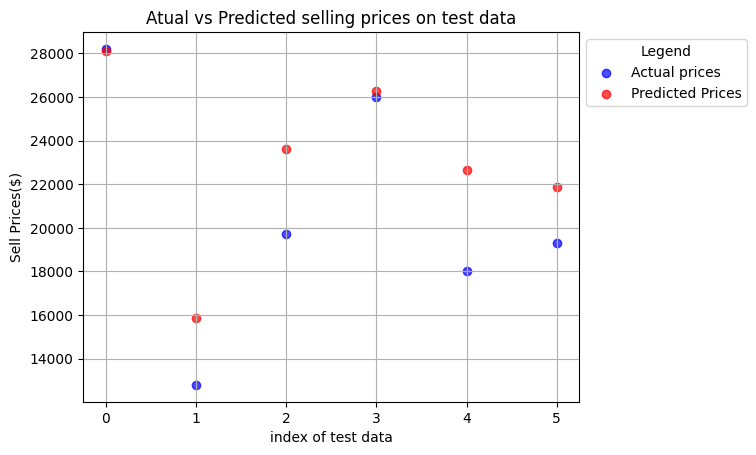

In [51]:
#Visualization of the "Atual vs Predicted selling prices on test data" through scatter plot
plt.Figure(figsize=(10,6))
plt.scatter(range(len(X_test)),Y_test,color='blue',label="Actual prices",alpha=0.7)
plt.scatter(range(len(X_test)),predicted_test_prices,color='red',label="Predicted Prices",alpha=0.7)
plt.title("Atual vs Predicted selling prices on test data")
plt.xlabel("index of test data")
plt.ylabel("Sell Prices($)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Legend")
plt.grid()
plt.show()

C:\Users\LINKON\AppData\Local\Temp\ipykernel_1428\1315340973.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


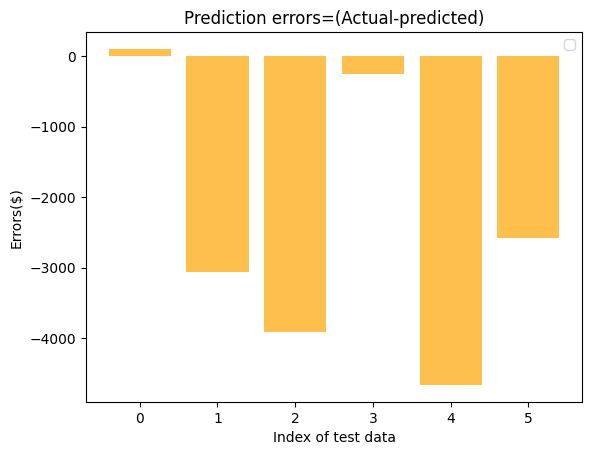

In [52]:
#Visualization of the "Prediction Errors" through bar plot
errors=Y_test-predicted_test_prices
plt.Figure(figsize=(10,6))
plt.bar(range(len(X_test)),errors,color='orange',alpha=0.7)
plt.title("Prediction errors=(Actual-predicted)")
plt.xlabel("Index of test data")
plt.ylabel("Errors($)")
plt.legend(loc="best")
plt.show()


In [53]:
import numpy as np 

c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\LINKON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


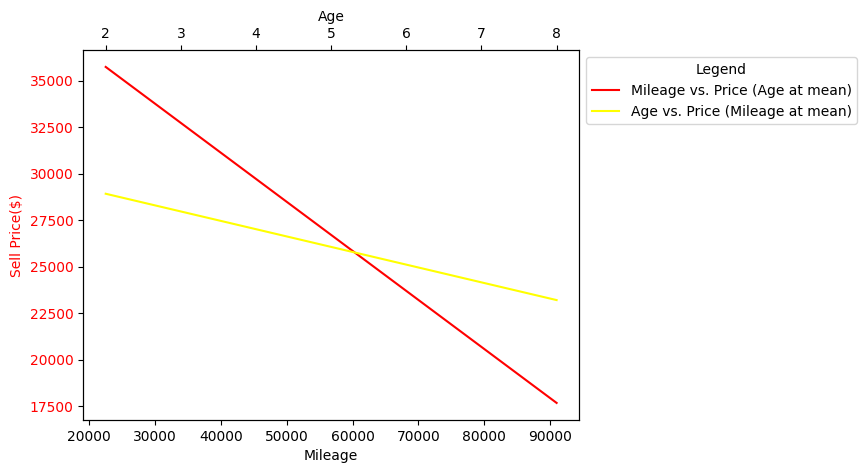

In [54]:
#Plotting both of the regression lines
import numpy as np
import matplotlib.pyplot as plt

# Assuming the data is already loaded into the 'df' DataFrame and the model is trained.

# Define the mileage range and calculate predicted prices
mileage_range = np.linspace(df["Mileage"].min(), df["Mileage"].max(), 100).reshape(-1, 1)
age_mean = df['Age(yrs)'].mean()
predicted_prices_mileage = model.predict(np.hstack([mileage_range, np.full_like(mileage_range, age_mean)]))

# Define the age range and calculate predicted prices
age_range = np.linspace(df["Age(yrs)"].min(), df["Age(yrs)"].max(), 100).reshape(-1, 1)
mileage_mean = df['Mileage'].mean()
predicted_prices_age = model.predict(np.hstack([np.full_like(age_range, mileage_mean), age_range]))

# Create the plot
fig, ax1 = plt.subplots()

# Plot the regression line for mileage
color = 'red'
ax1.plot(mileage_range, predicted_prices_mileage, color=color, label="Mileage vs. Price (Age at mean)")
ax1.set_xlabel('Mileage')  # Primary x-axis for mileage
ax1.set_ylabel('Sell Price($)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Add secondary x-axis for age
ax2 = ax1.twiny()
color = 'yellow'
ax2.plot(age_range, predicted_prices_age, color=color, label="Age vs. Price (Mileage at mean)")
ax2.set_xlabel('Age')  # Secondary x-axis for age
ax2.tick_params(axis='x', labelcolor="black")

# Add a single legend combining both lines
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1, 1), title='Legend', title_fontsize=10)

# Show the plot
#plt.tight_layout()
plt.show()
